In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bering = pd.read_excel(filepath, sheet_name='Bering-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Bering)
fp.date_time(Bering)

,Extent,Date
0,320266.650,1979-01-01
1,541778.338,1979-02-01
2,638262.988,1979-03-01
3,423025.159,1979-04-01
4,215587.216,1979-05-01
...,...,...
488,317377.493,2023-05-01
489,39601.476,2023-06-01
490,16935.702,2023-07-01
491,1305.744,2023-09-01


In [5]:
scaler = MinMaxScaler()
Bering['Extent'] = scaler.fit_transform(Bering['Extent'].values.reshape(-1, 1))

In [6]:
extent = Bering['Extent']
W_S=12
X,y = fp.df_to_X_y(extent, W_S)
X.shape, y.shape

((481, 12, 1), (481,))

In [7]:
X_train, y_train = X[:384], y[:384]
X_val, y_val = X[384:432], y[384:432]
X_test, y_test = X[432:], y[432:]

In [8]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(64, kernel_constraint=MaxNorm(1.0), activation='relu', return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [9]:
cp = ModelCheckpoint('Bering_model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [10]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
48/48 [==============================] - ETA: 0s - loss: 0.2066 - root_mean_squared_error: 0.4545

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 8s 115ms/step - loss: 0.2066 - root_mean_squared_error: 0.4545 - val_loss: 0.0644 - val_root_mean_squared_error: 0.2539
Epoch 2/50
42/48 [=========================>....] - ETA: 0s - loss: 0.1097 - root_mean_squared_error: 0.3312

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 99ms/step - loss: 0.1063 - root_mean_squared_error: 0.3260 - val_loss: 0.0541 - val_root_mean_squared_error: 0.2326
Epoch 3/50
41/48 [========================>.....] - ETA: 0s - loss: 0.0701 - root_mean_squared_error: 0.2648

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 103ms/step - loss: 0.0683 - root_mean_squared_error: 0.2614 - val_loss: 0.0447 - val_root_mean_squared_error: 0.2115
Epoch 4/50
44/48 [==========================>...] - ETA: 0s - loss: 0.0495 - root_mean_squared_error: 0.2225

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 112ms/step - loss: 0.0504 - root_mean_squared_error: 0.2245 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1963
Epoch 5/50
44/48 [==========================>...] - ETA: 0s - loss: 0.0374 - root_mean_squared_error: 0.1934

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 105ms/step - loss: 0.0387 - root_mean_squared_error: 0.1968 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1859
Epoch 6/50
42/48 [=========================>....] - ETA: 0s - loss: 0.0322 - root_mean_squared_error: 0.1794

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 4s 75ms/step - loss: 0.0303 - root_mean_squared_error: 0.1741 - val_loss: 0.0319 - val_root_mean_squared_error: 0.1787
Epoch 7/50
37/48 [======================>.......] - ETA: 0s - loss: 0.0234 - root_mean_squared_error: 0.1530

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 4s 80ms/step - loss: 0.0228 - root_mean_squared_error: 0.1510 - val_loss: 0.0297 - val_root_mean_squared_error: 0.1723
Epoch 8/50
40/48 [========================>.....] - ETA: 0s - loss: 0.0203 - root_mean_squared_error: 0.1426

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 96ms/step - loss: 0.0222 - root_mean_squared_error: 0.1490 - val_loss: 0.0279 - val_root_mean_squared_error: 0.1671
Epoch 9/50
41/48 [========================>.....] - ETA: 0s - loss: 0.0201 - root_mean_squared_error: 0.1416

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 105ms/step - loss: 0.0203 - root_mean_squared_error: 0.1423 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1628
Epoch 10/50
47/48 [============================>.] - ETA: 0s - loss: 0.0196 - root_mean_squared_error: 0.1400

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 115ms/step - loss: 0.0193 - root_mean_squared_error: 0.1388 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1529
Epoch 11/50
40/48 [========================>.....] - ETA: 0s - loss: 0.0138 - root_mean_squared_error: 0.1174

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 107ms/step - loss: 0.0151 - root_mean_squared_error: 0.1229 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1447
Epoch 12/50
43/48 [=========================>....] - ETA: 0s - loss: 0.0177 - root_mean_squared_error: 0.1331

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 105ms/step - loss: 0.0171 - root_mean_squared_error: 0.1307 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1358
Epoch 13/50
42/48 [=========================>....] - ETA: 0s - loss: 0.0151 - root_mean_squared_error: 0.1229

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 102ms/step - loss: 0.0152 - root_mean_squared_error: 0.1232 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1272
Epoch 14/50
44/48 [==========================>...] - ETA: 0s - loss: 0.0157 - root_mean_squared_error: 0.1252

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 98ms/step - loss: 0.0157 - root_mean_squared_error: 0.1254 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1240
Epoch 15/50
44/48 [==========================>...] - ETA: 0s - loss: 0.0189 - root_mean_squared_error: 0.1374

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 106ms/step - loss: 0.0189 - root_mean_squared_error: 0.1376 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1188
Epoch 16/50
42/48 [=========================>....] - ETA: 0s - loss: 0.0159 - root_mean_squared_error: 0.1260

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 98ms/step - loss: 0.0159 - root_mean_squared_error: 0.1263 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1108
Epoch 17/50
39/48 [=======================>......] - ETA: 0s - loss: 0.0116 - root_mean_squared_error: 0.1076

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 98ms/step - loss: 0.0127 - root_mean_squared_error: 0.1125 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1069
Epoch 18/50
45/48 [===========================>..] - ETA: 0s - loss: 0.0177 - root_mean_squared_error: 0.1329

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 107ms/step - loss: 0.0171 - root_mean_squared_error: 0.1306 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0982
Epoch 19/50
43/48 [=========================>....] - ETA: 0s - loss: 0.0117 - root_mean_squared_error: 0.1083

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 98ms/step - loss: 0.0120 - root_mean_squared_error: 0.1095 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0944
Epoch 20/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0181 - root_mean_squared_error: 0.1345 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0960
Epoch 21/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0141 - root_mean_squared_error: 0.1186 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1041
Epoch 22/50
48/48 [==============================] - 0s 7ms/step - loss: 0.0147 - root_mean_squared_error: 0.1213 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1066
Epoch 23/50
48/48 [==============================] - 0s 7ms/step - loss: 0.0167 - root_mean_squared_error: 0.1292 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0981
Epoch 24/50
46/48 [===========================>..] - ETA: 0s - loss: 0.0168 - root_mean_squared_error: 0.1298

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 5s 101ms/step - loss: 0.0163 - root_mean_squared_error: 0.1278 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0929
Epoch 25/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0181 - root_mean_squared_error: 0.1345 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0953
Epoch 26/50
48/48 [==============================] - 0s 7ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1161
Epoch 27/50
48/48 [==============================] - 0s 7ms/step - loss: 0.0137 - root_mean_squared_error: 0.1172 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1017
Epoch 28/50
48/48 [==============================] - 0s 8ms/step - loss: 0.0150 - root_mean_squared_error: 0.1226 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1022
Epoch 29/50
48/48 [==============================] - 0s 8ms/step - loss: 0.0161 - root_mean_squared_error: 0.1267 - val_loss: 0.0099 - val_root_mean_square

INFO:tensorflow:Assets written to: Bering_model\assets


INFO:tensorflow:Assets written to: Bering_model\assets


48/48 [==============================] - 4s 89ms/step - loss: 0.0167 - root_mean_squared_error: 0.1293 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0925
Epoch 39/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0148 - root_mean_squared_error: 0.1218 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0936
Epoch 40/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0175 - root_mean_squared_error: 0.1322 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1143
Epoch 41/50
48/48 [==============================] - 0s 7ms/step - loss: 0.0148 - root_mean_squared_error: 0.1218 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1010
Epoch 42/50
48/48 [==============================] - 0s 8ms/step - loss: 0.0152 - root_mean_squared_error: 0.1233 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0937
Epoch 43/50
48/48 [==============================] - 0s 8ms/step - loss: 0.0119 - root_mean_squared_error: 0.1092 - val_loss: 0.0108 - val_root_mean_squared

In [11]:
time = (etime - stime)/60
print(f'{time} minutes')

1.874146298567454 minutes


In [12]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

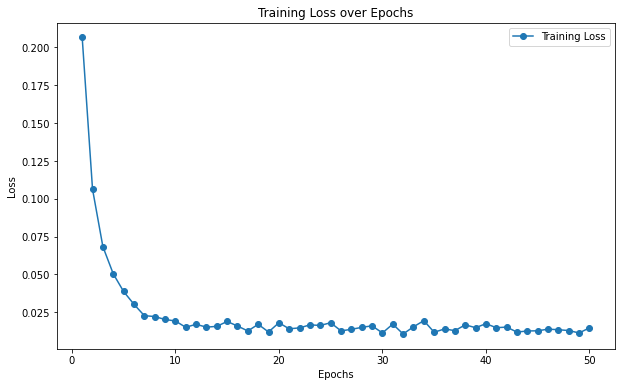

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

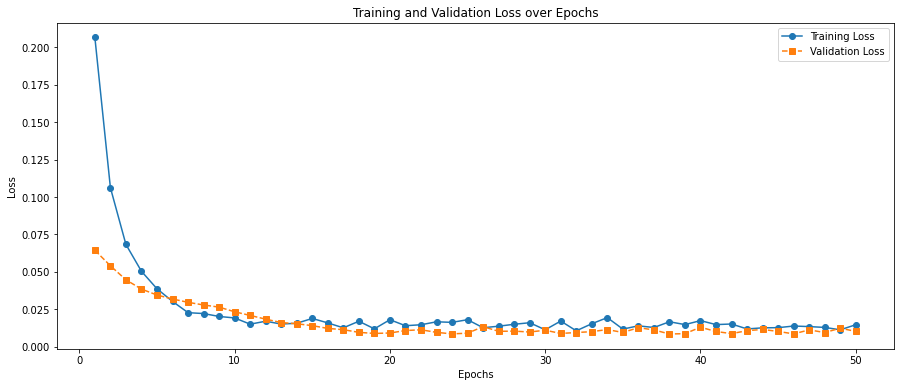

In [14]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [8]:
from tensorflow.keras.models import load_model
model1 = load_model('Bering_model/')

In [9]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 13ms/step


In [10]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.05281128532775638
MAE : 0.042789801019918326


In [17]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [18]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,138793.859375,64252.220
1,20103.255859,32185.203
2,55119.046875,2490.551
3,25598.126953,1707.377
4,94121.148438,11293.282
5,122282.617188,49957.406
6,238207.859375,151973.751
7,361820.687500,466524.938
8,574979.062500,708542.184
9,653677.562500,652598.000


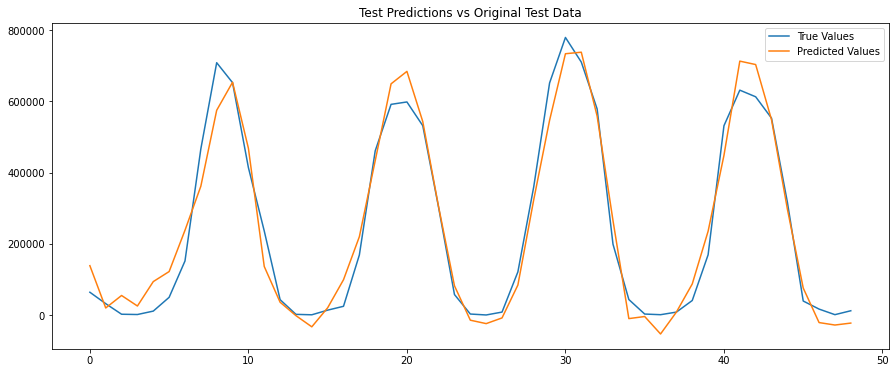

In [19]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [9]:
predictions = model1.predict(X)

16/16 [==============================] - 1s 4ms/step


In [10]:
mse = mean_squared_error(y, predictions)
print(mse)

0.005165124355922127


In [11]:
mae = mean_absolute_error(y, predictions)
print(mae)

0.056790430754090473


In [12]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

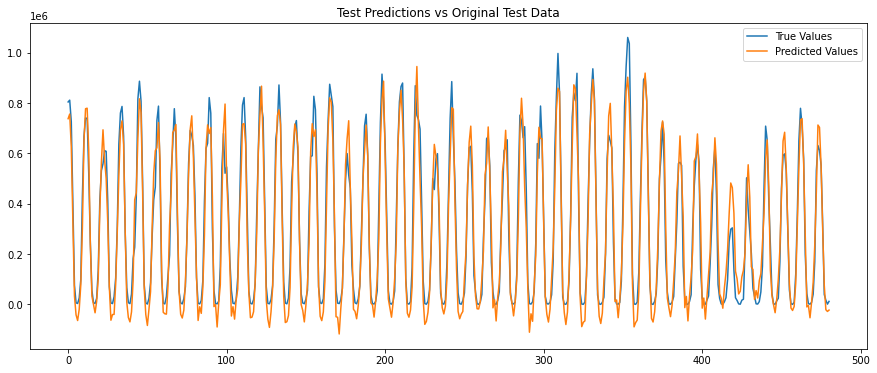

In [13]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()